## **01-Exploración inicial de los datos**



Exploración inicial de los datos

William Alexander Torres Zambrano

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import io

In [2]:
# Descargar el archivo comprimido desde GitHub
!wget https://github.com/watorres/ProyectoDeepLearning/raw/main/device_gnss.csv.zip

--2023-05-31 21:50:26--  https://github.com/watorres/ProyectoDeepLearning/raw/main/device_gnss.csv.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/watorres/ProyectoDeepLearning/main/device_gnss.csv.zip [following]
--2023-05-31 21:50:26--  https://raw.githubusercontent.com/watorres/ProyectoDeepLearning/main/device_gnss.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9790985 (9.3M) [application/zip]
Saving to: ‘device_gnss.csv.zip’

device_gnss.csv.zip 100%[===================>]   9.34M  --.-KB/s    in 0.08s   

2023-05-31 21:50:27 (120 MB/s) - ‘device_gnss.csv.zip’ saved [9790985/

In [3]:
# Descomprimir el archivo
with zipfile.ZipFile('device_gnss.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('device_gnss.csv')

In [7]:
# Conversión de columnas numéricas
numeric_columns = df.columns.drop(['MessageType'])  # Excluir columna no numérica

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
# Exploración inicial de los datos
print("Número de filas y columnas:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())

Número de filas y columnas: (55998, 47)

Primeras 5 filas:
  MessageType  utcTimeMillis     TimeNanos  LeapSecond        FullBiasNanos  \
0         Raw  1590792293438  498797000000         NaN -1274827012641492280   
1         Raw  1590792293438  498797000000         NaN -1274827012641492280   
2         Raw  1590792293438  498797000000         NaN -1274827012641492280   
3         Raw  1590792293438  498797000000         NaN -1274827012641492280   
4         Raw  1590792293438  498797000000         NaN -1274827012641492280   

   BiasNanos  BiasUncertaintyNanos  DriftNanosPerSecond  \
0  -0.989885             42.117361             4.823652   
1  -0.989885             42.117361             4.823652   
2  -0.989885             42.117361             4.823652   
3  -0.989885             42.117361             4.823652   
4  -0.989885             42.117361             4.823652   

   DriftUncertaintyNanosPerSecond  HardwareClockDiscontinuityCount  ...  \
0                       13.609111   

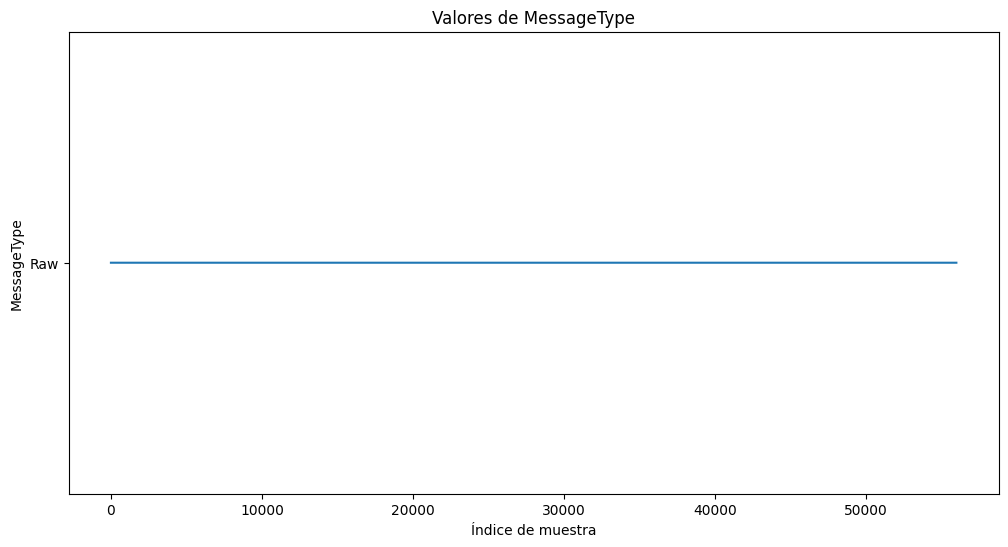

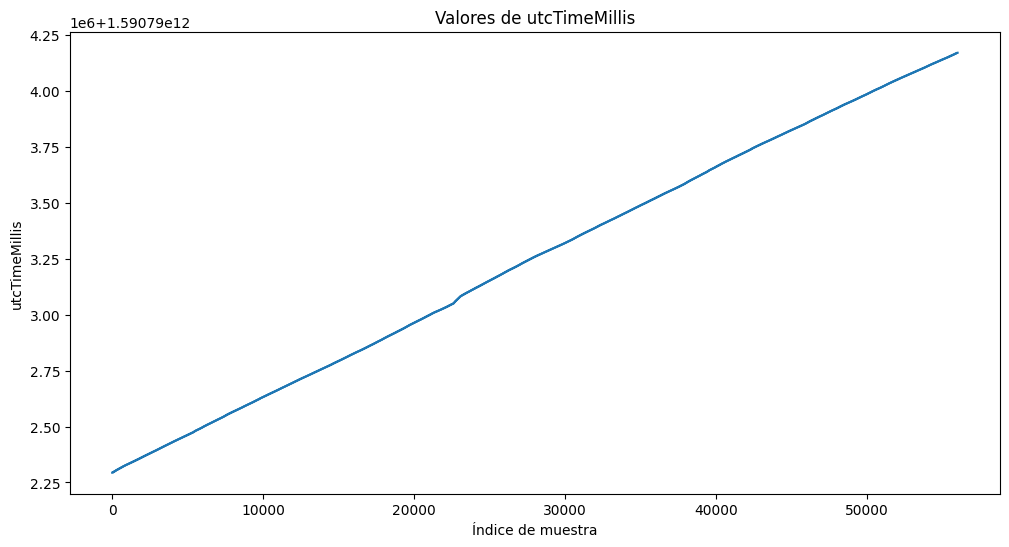

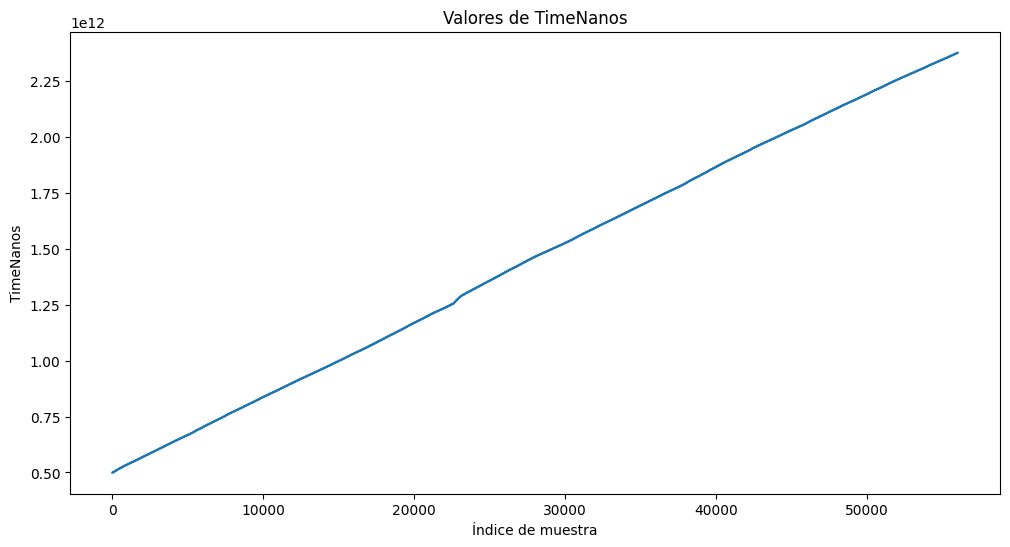

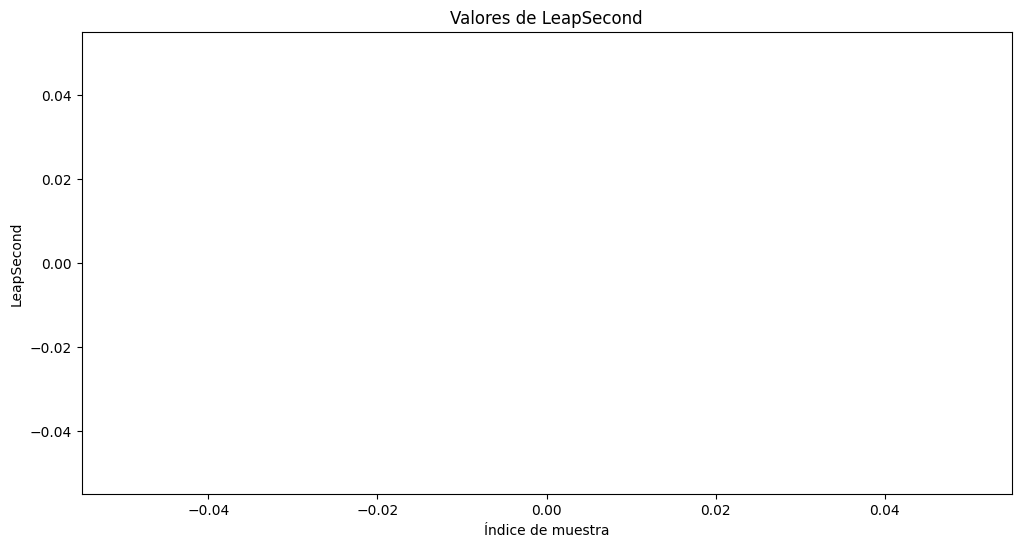

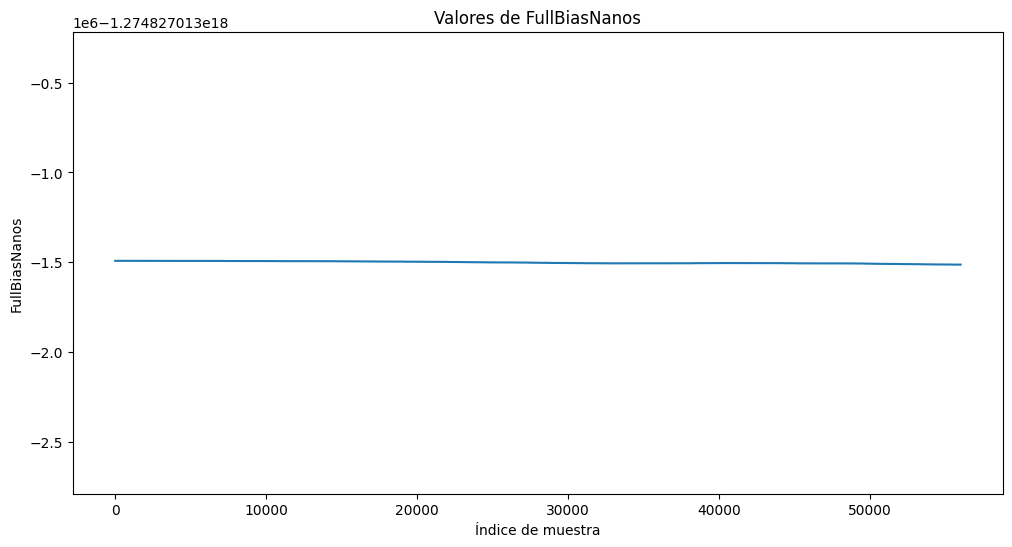

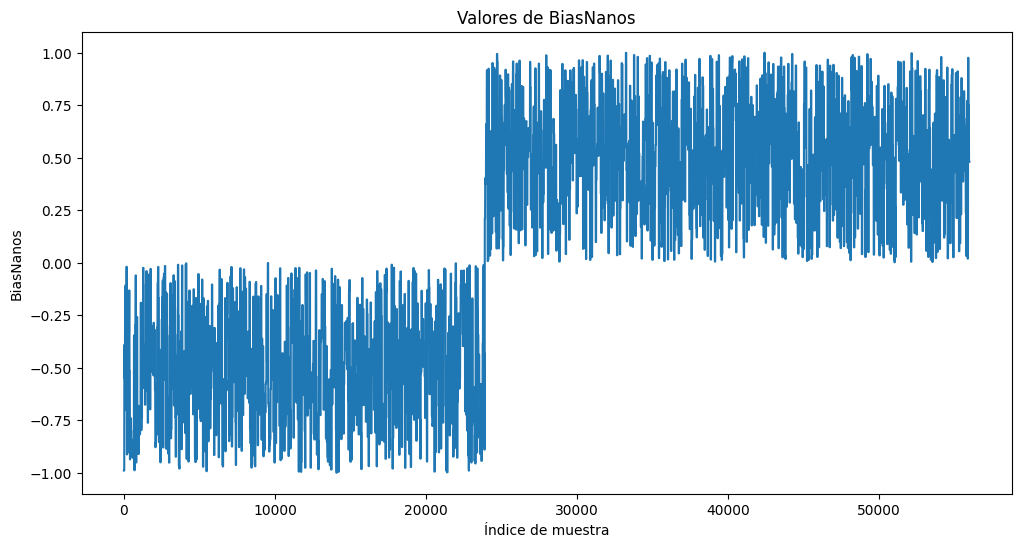

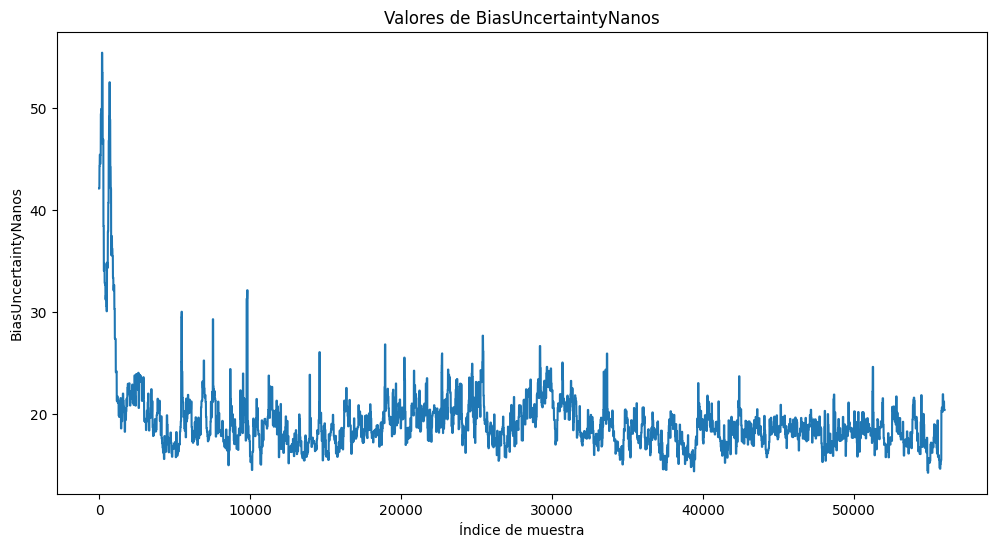

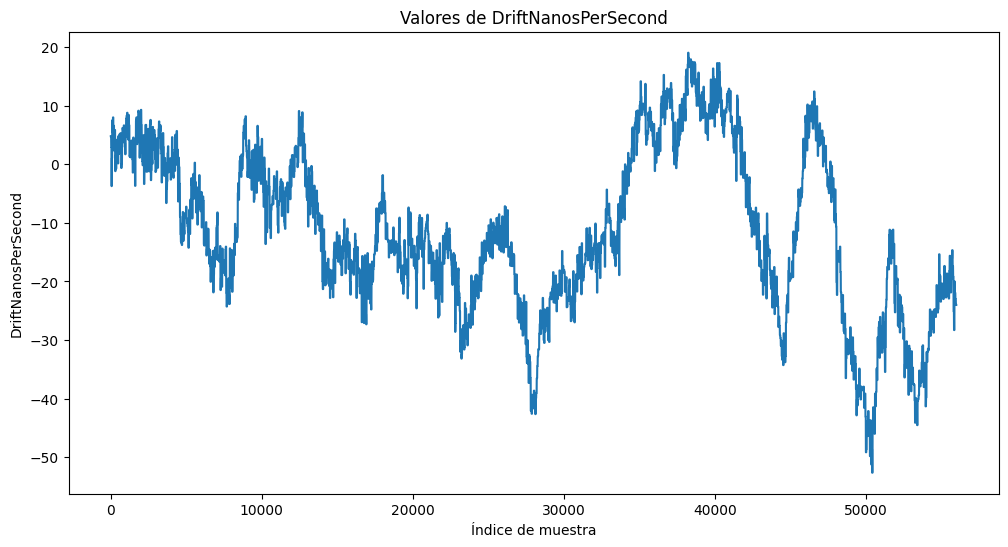

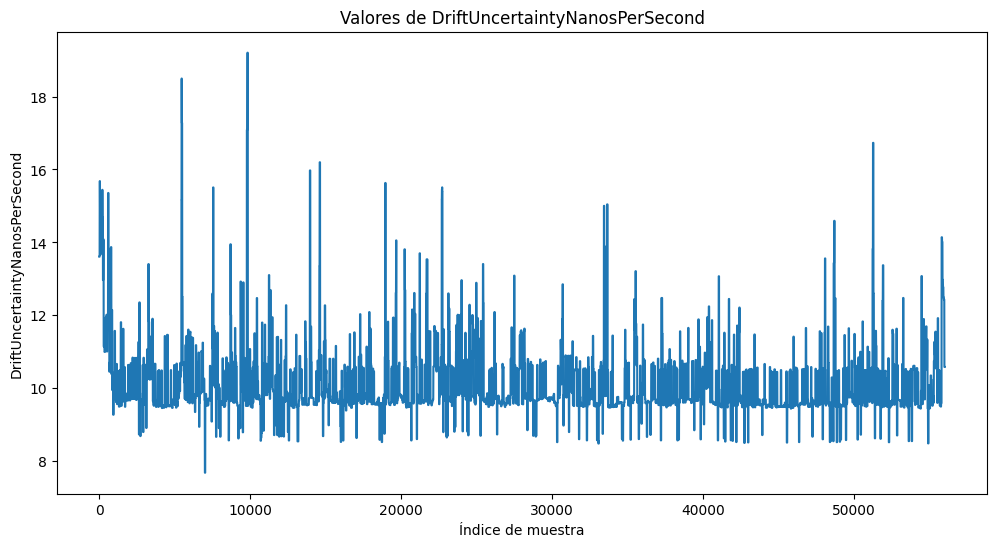

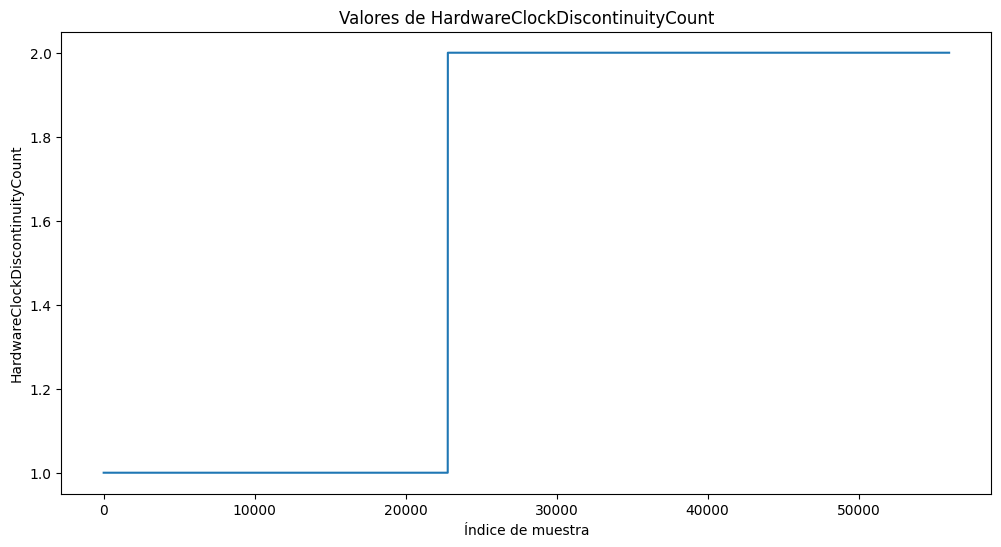

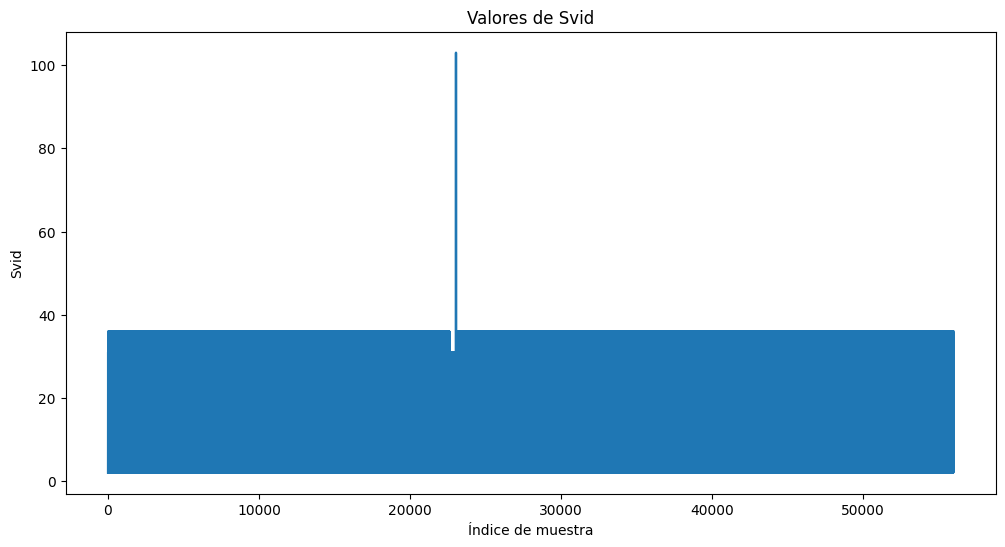

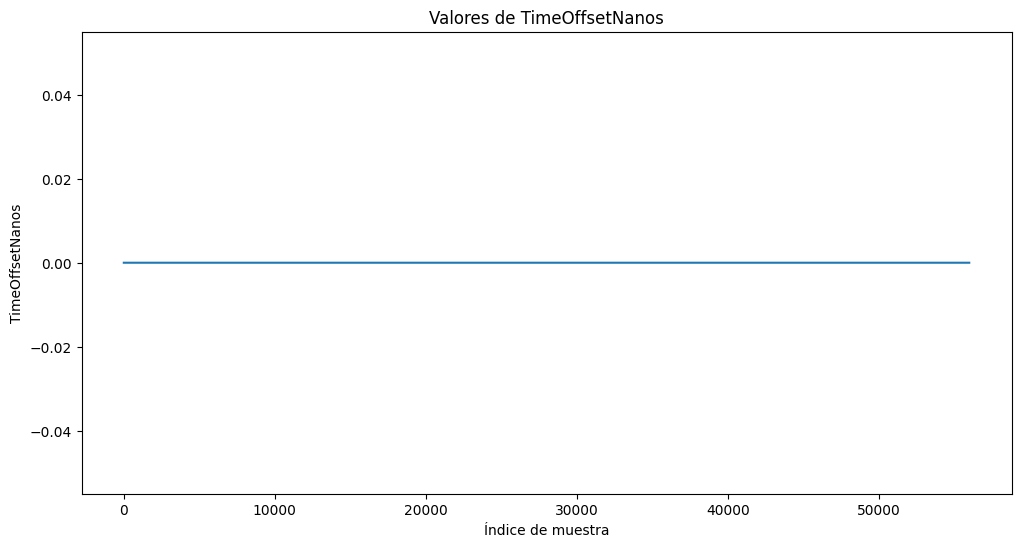

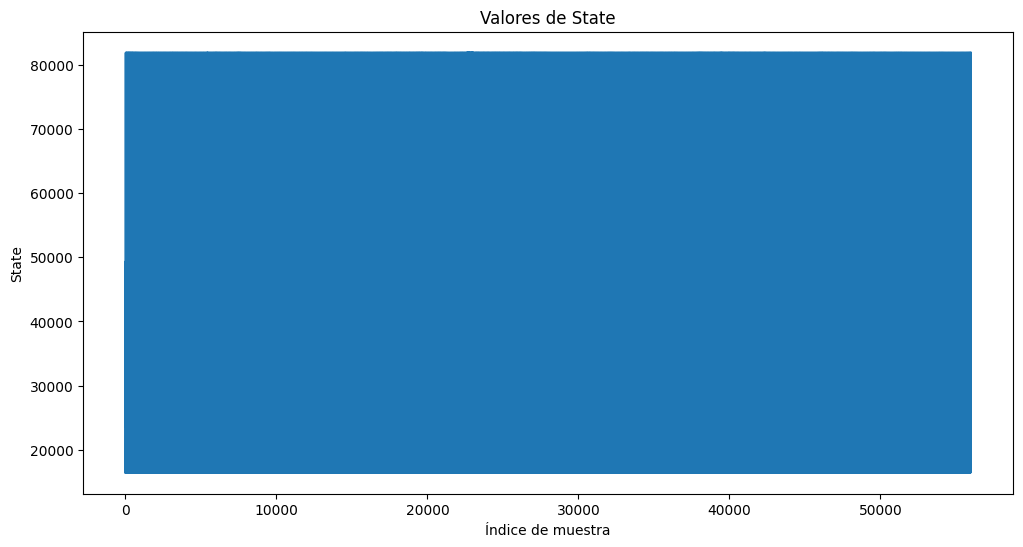

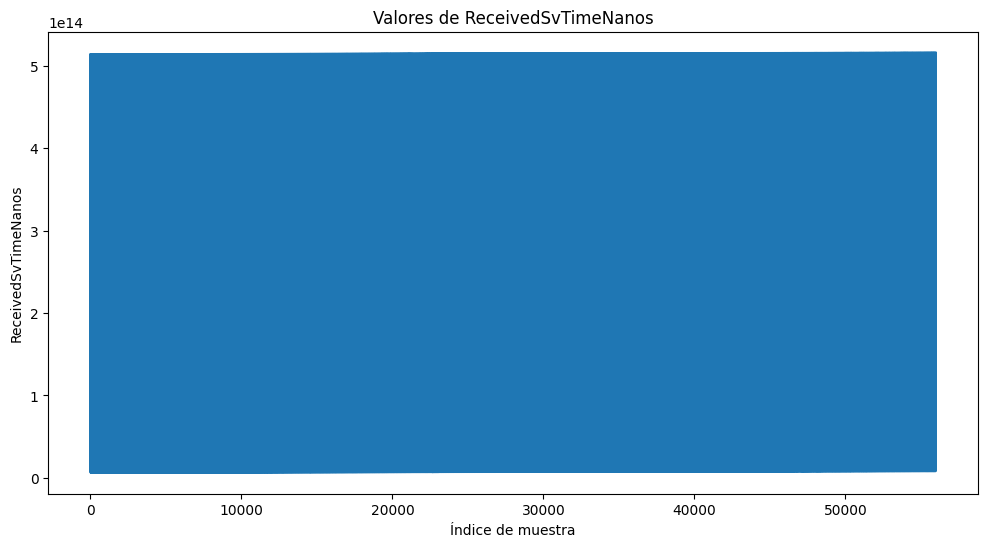

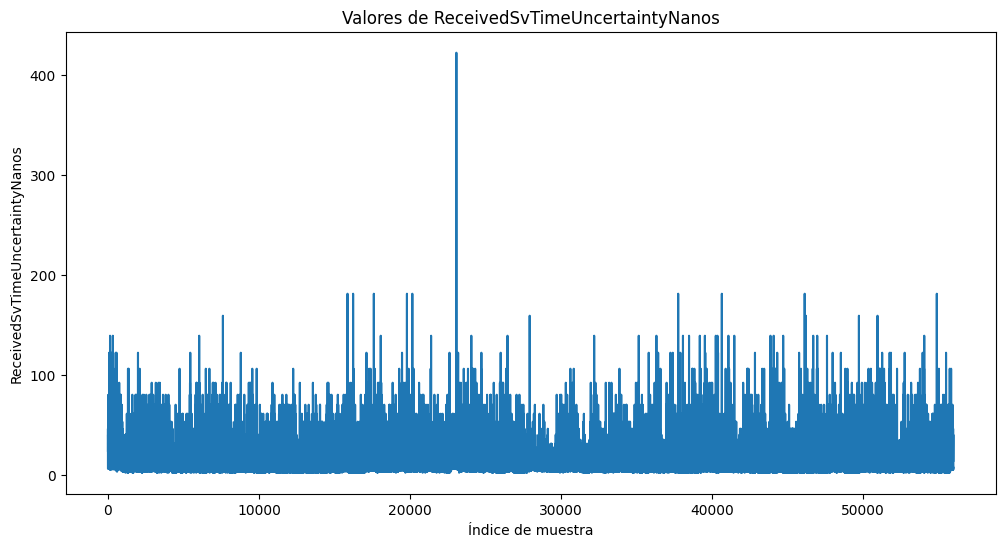

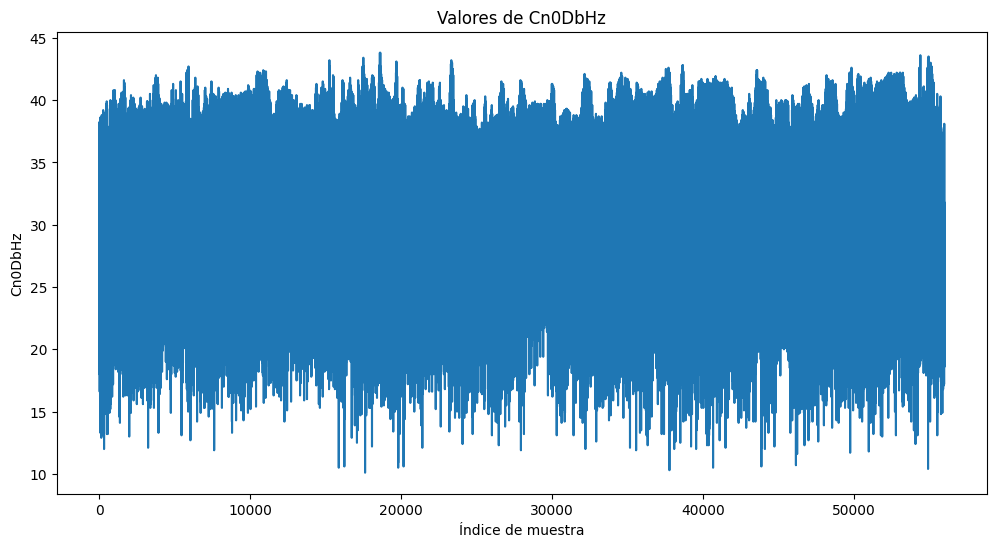

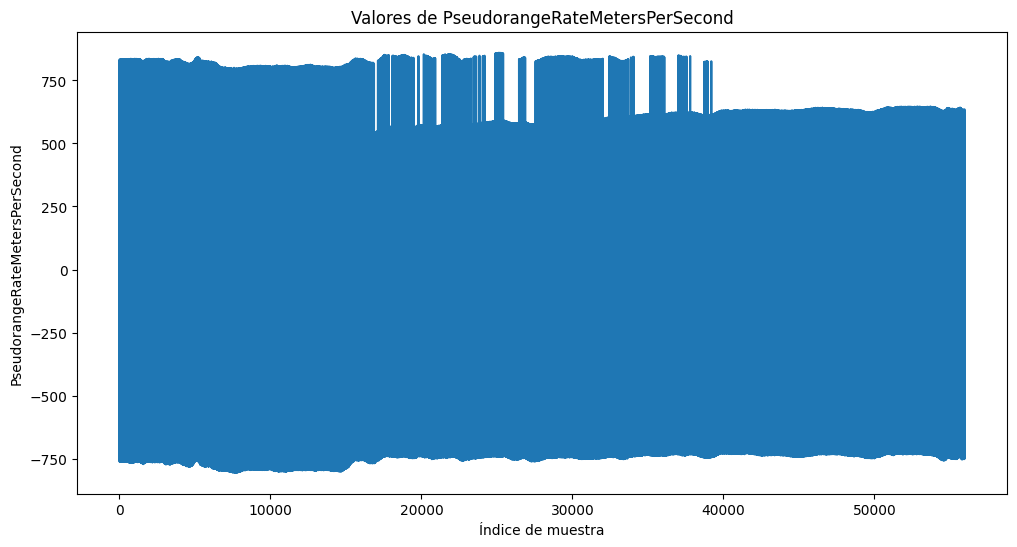

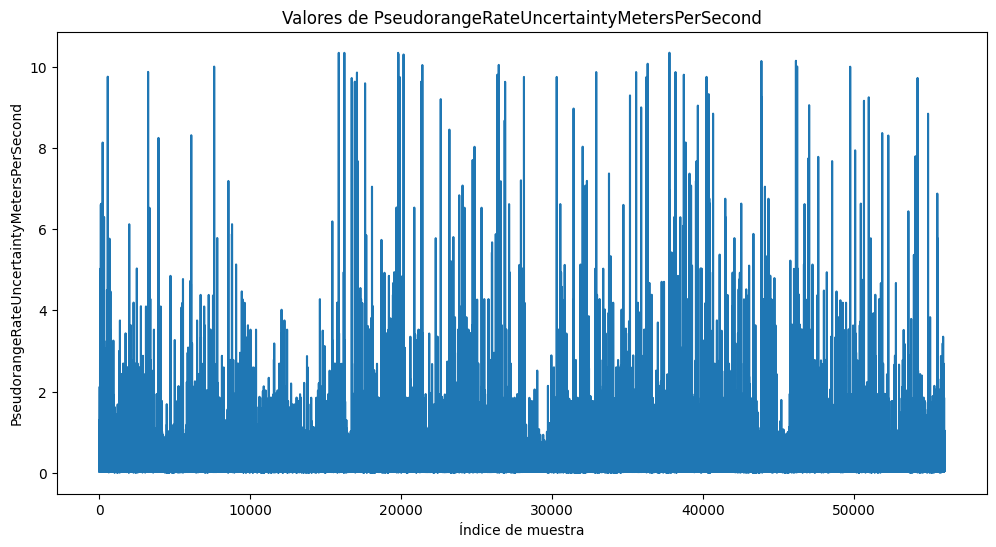

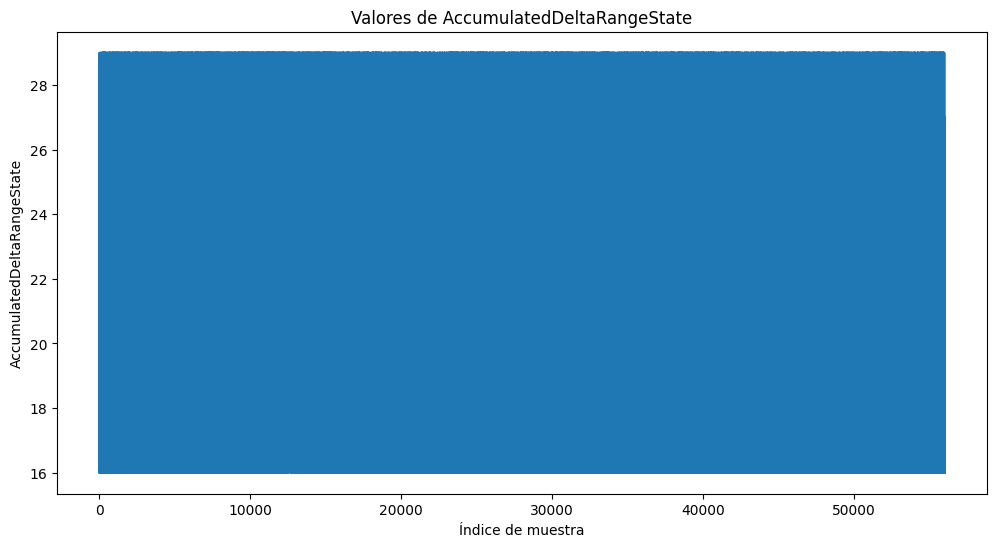

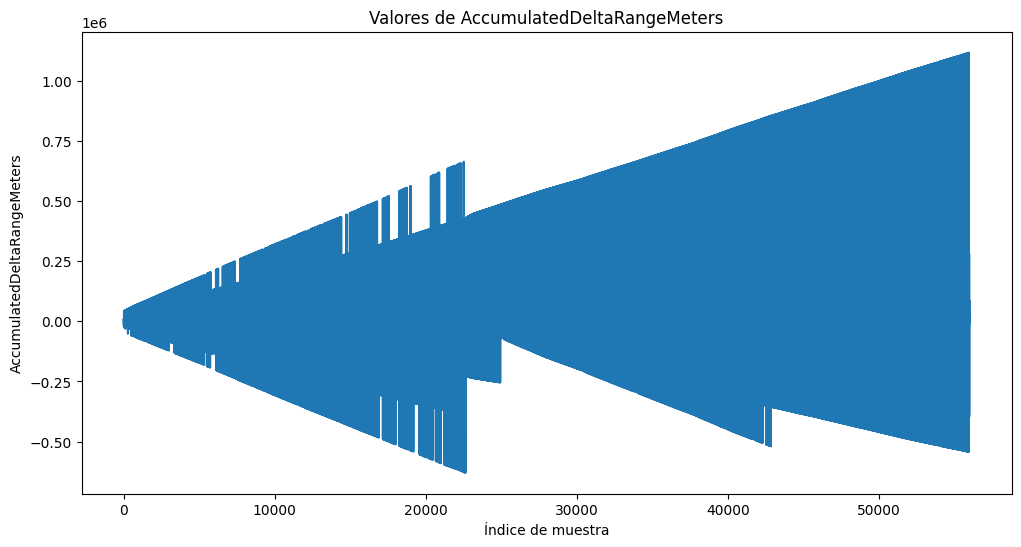

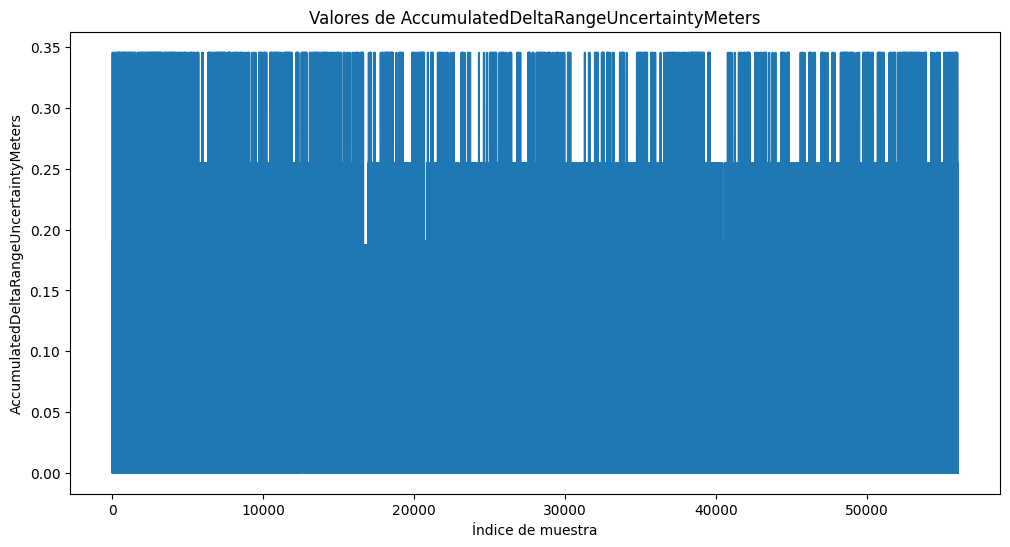

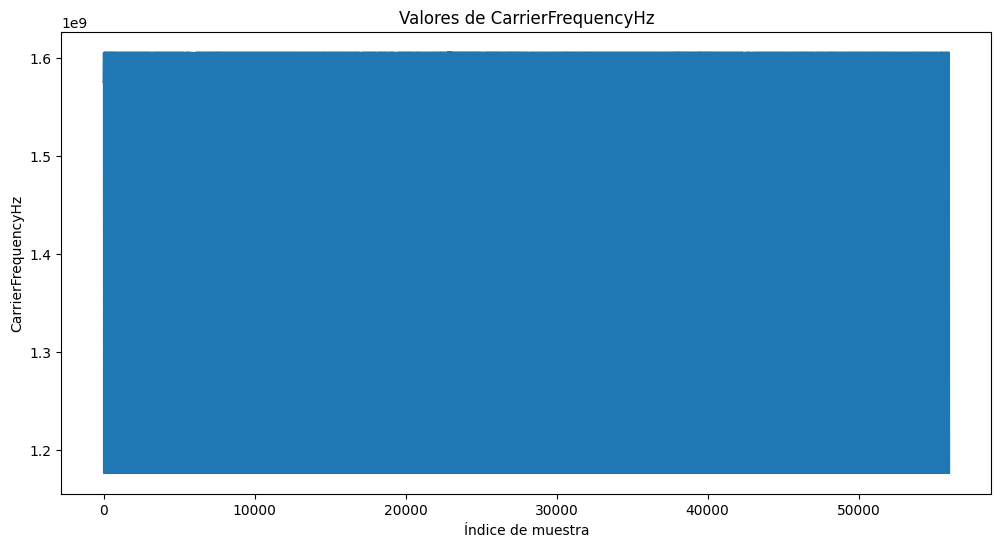

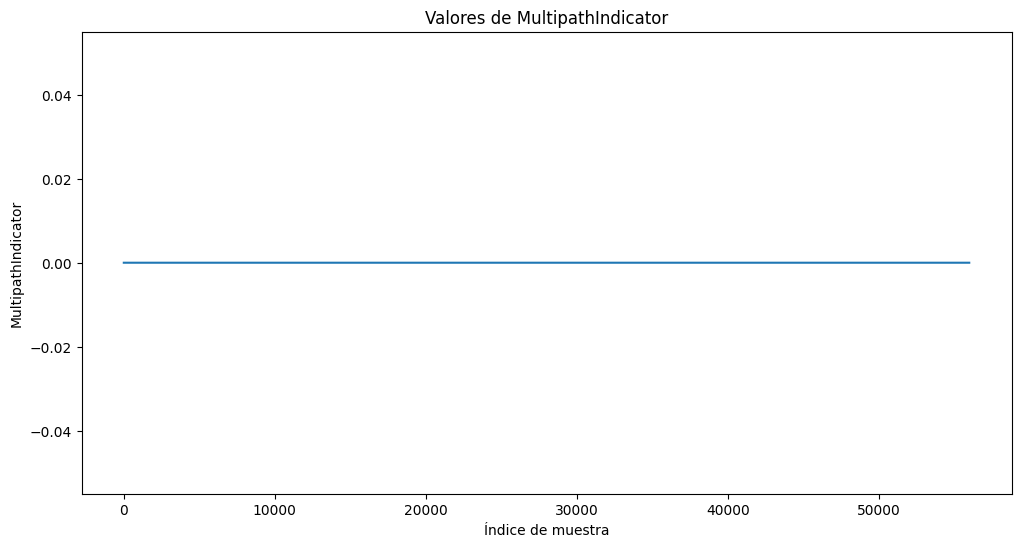

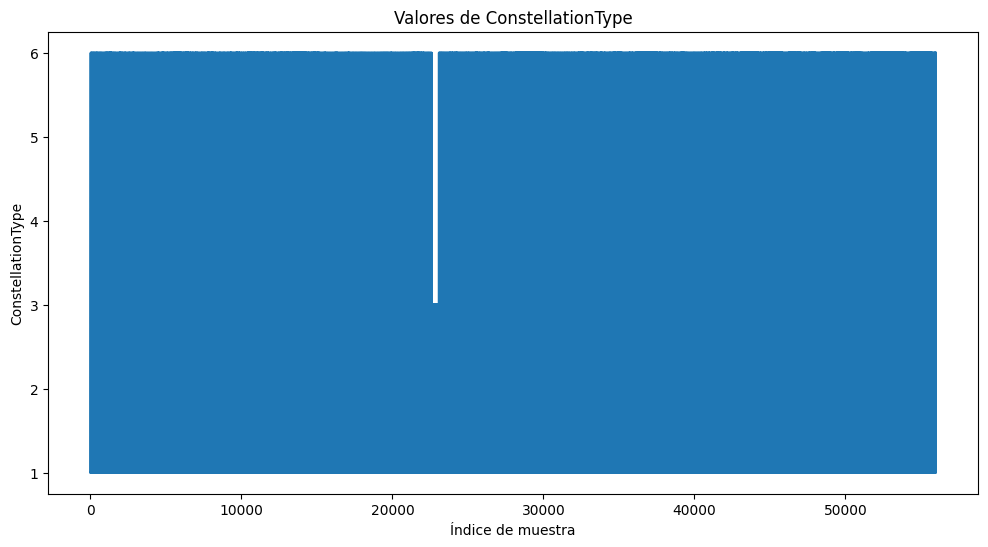

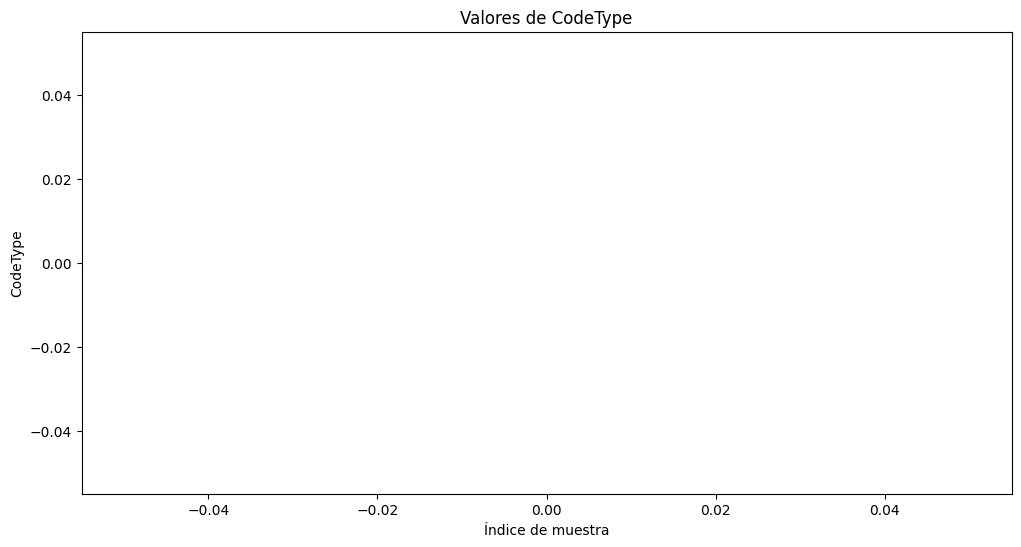

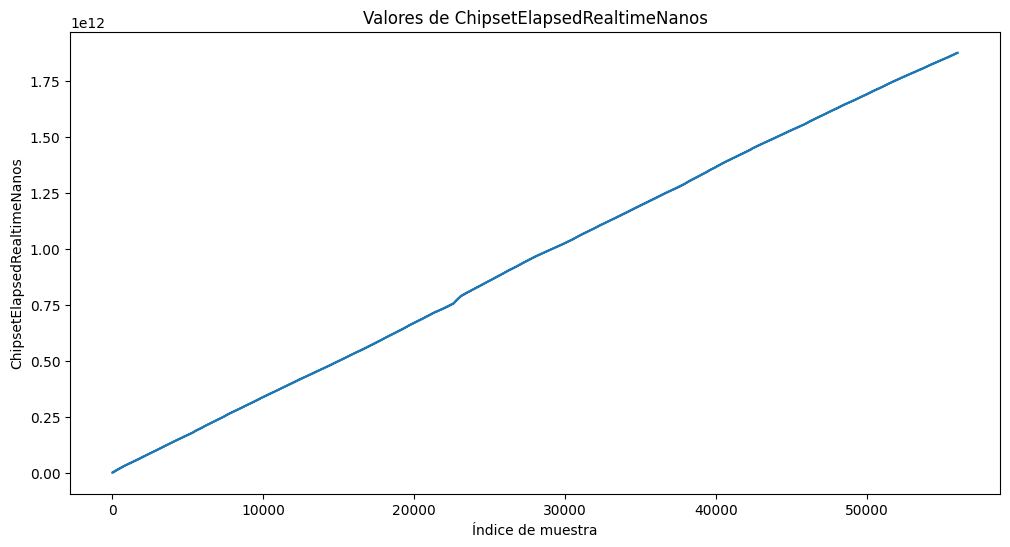

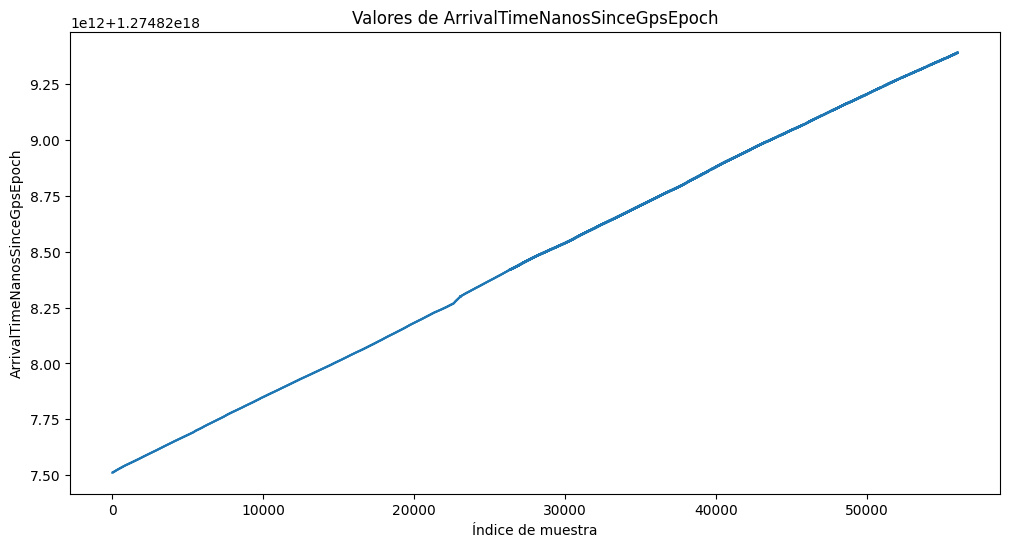

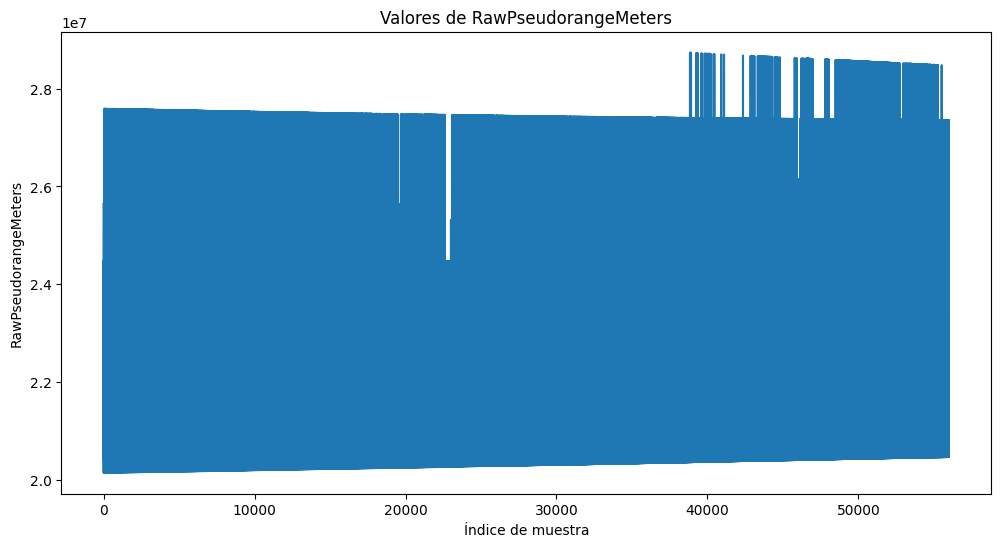

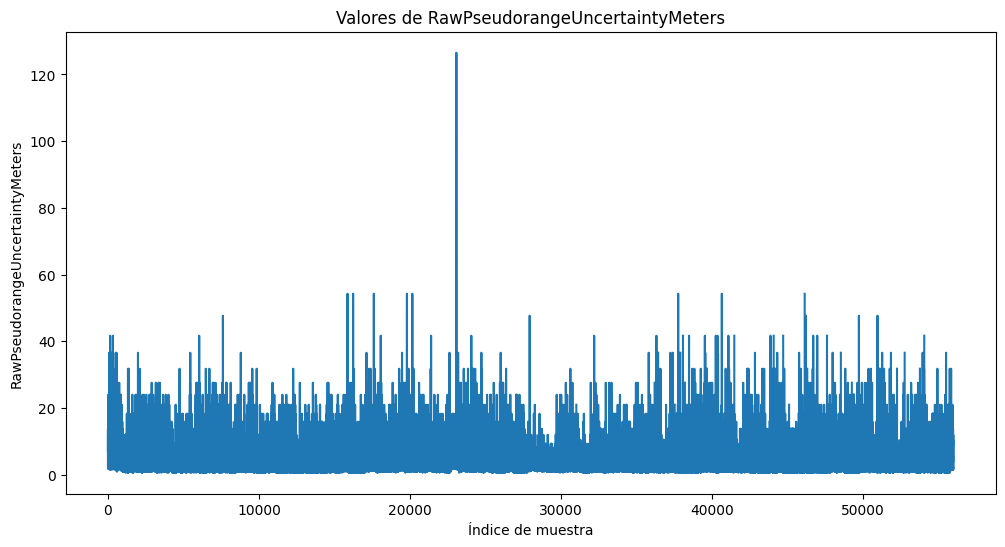

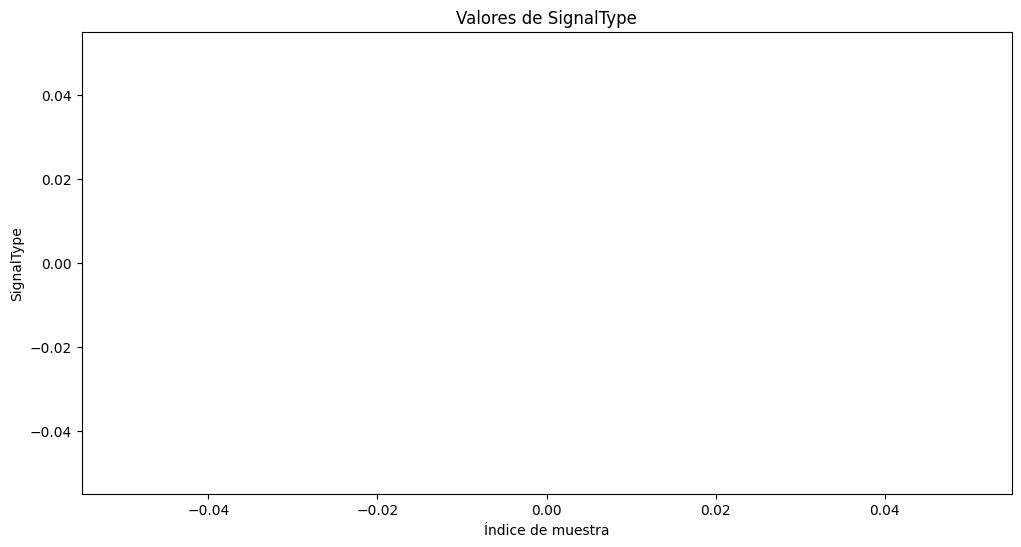

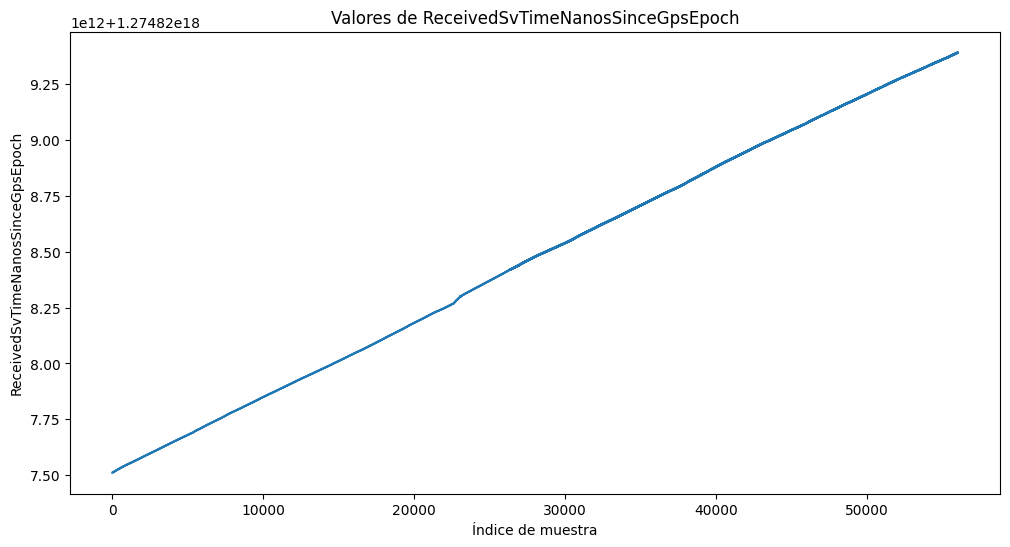

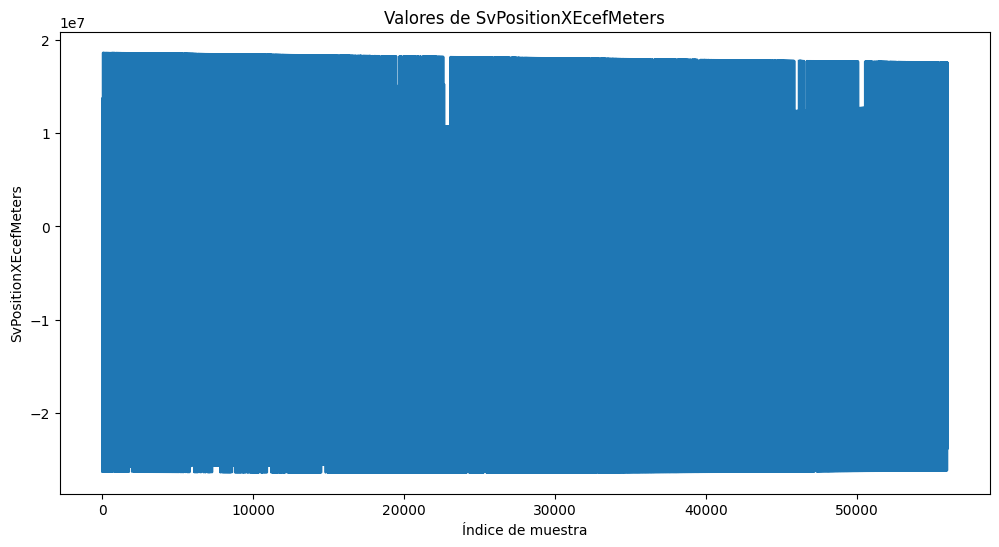

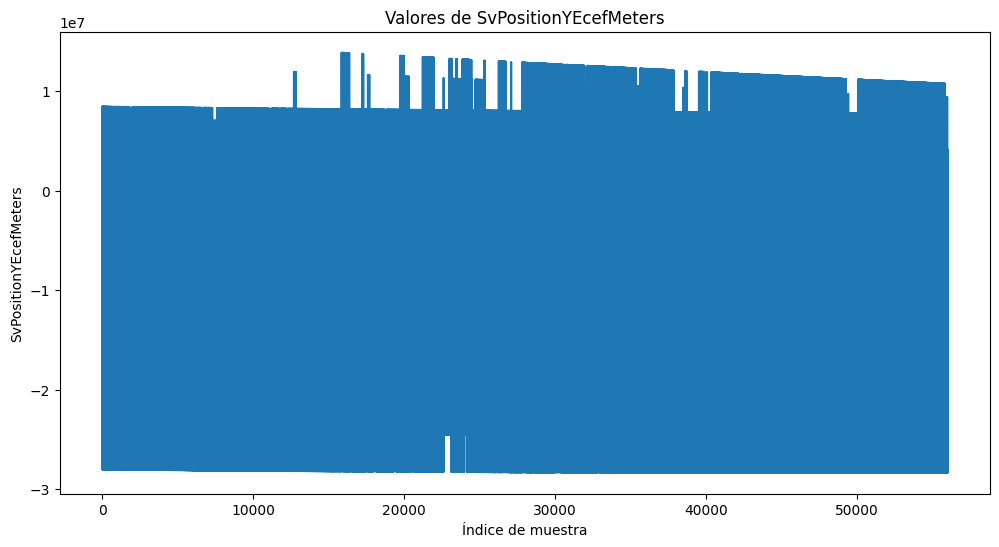

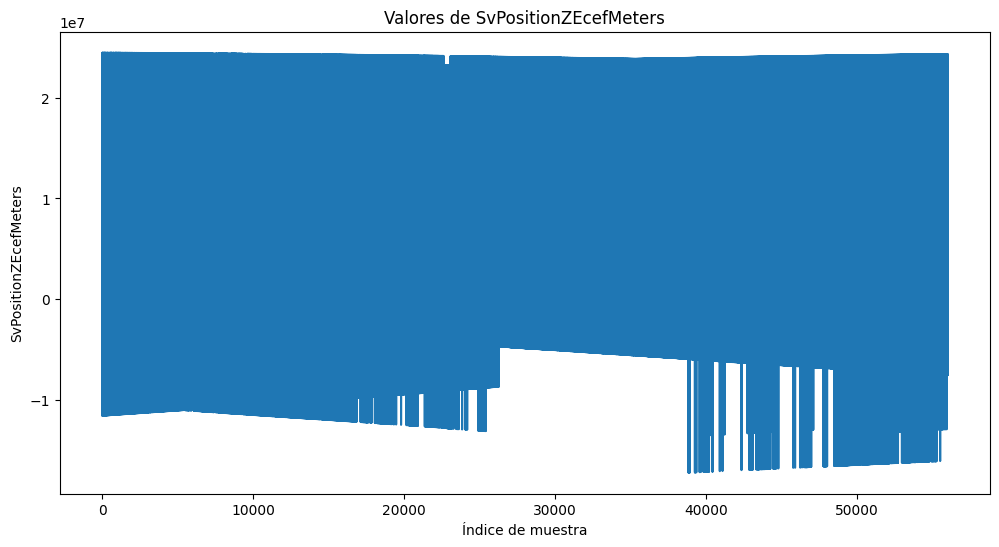

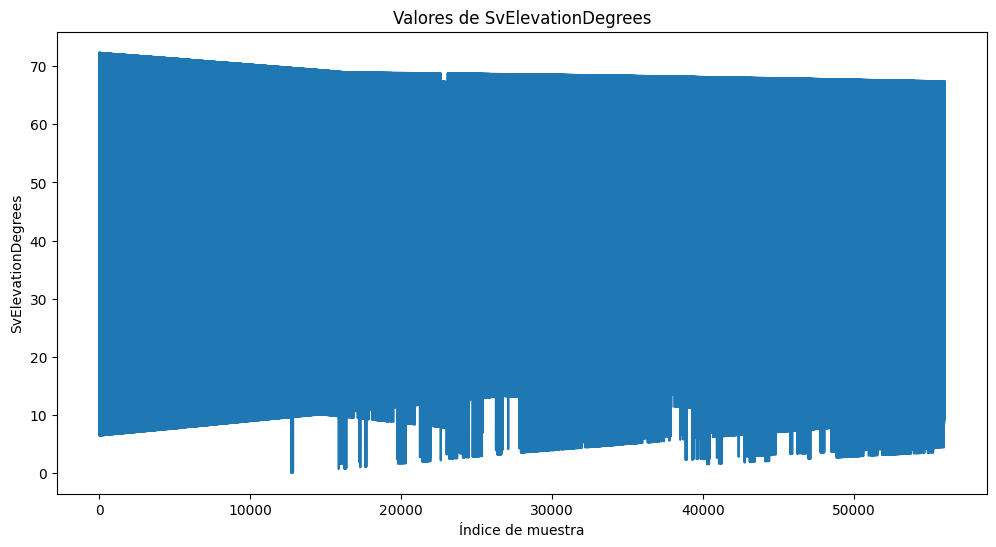

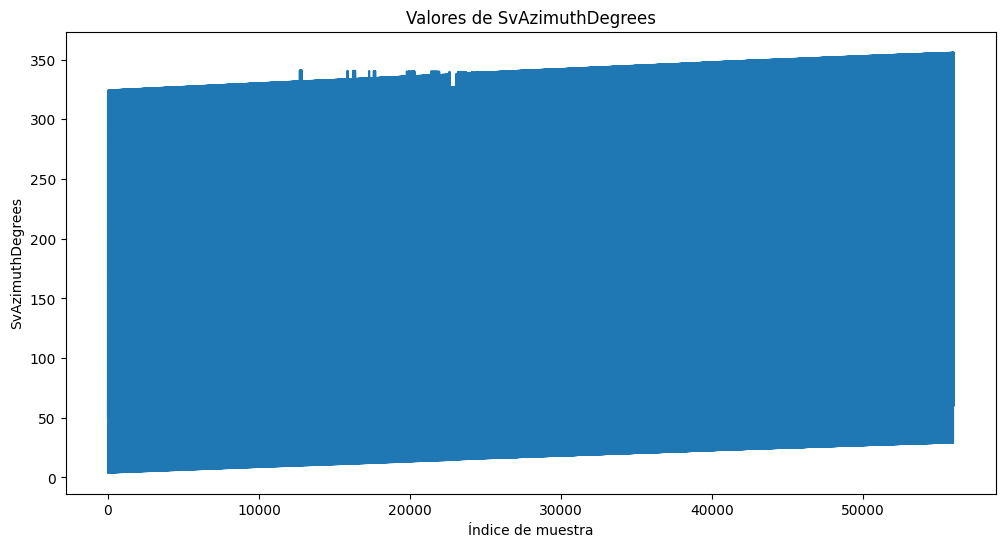

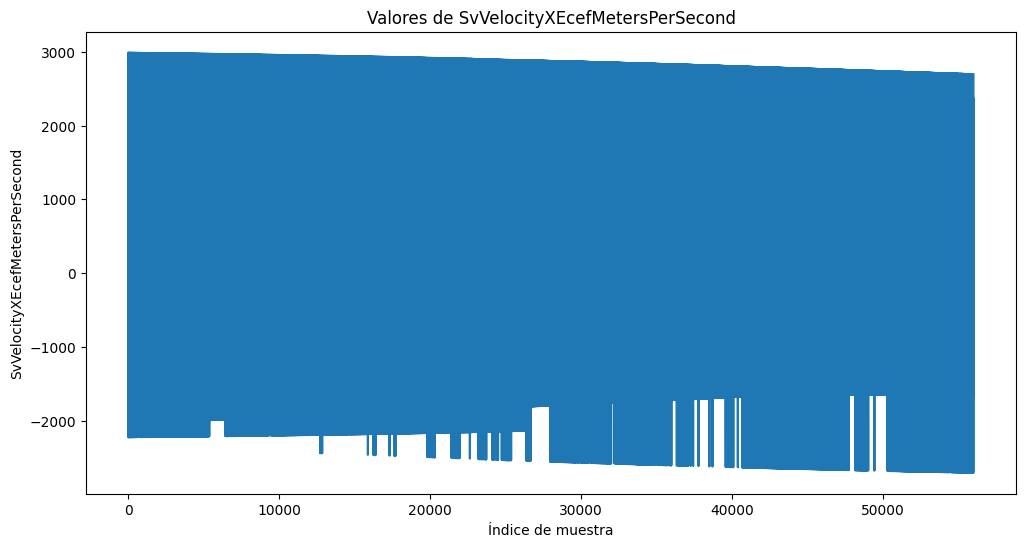

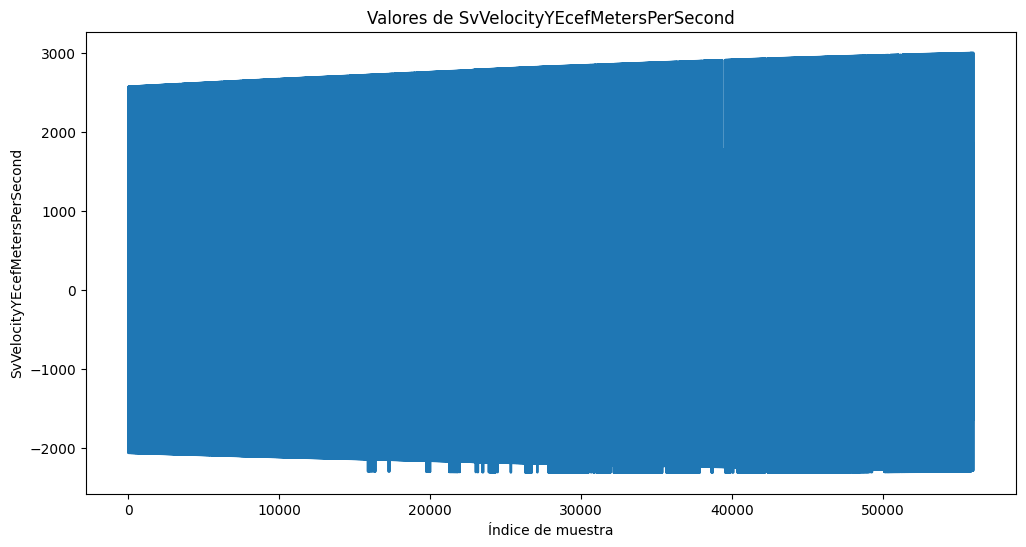

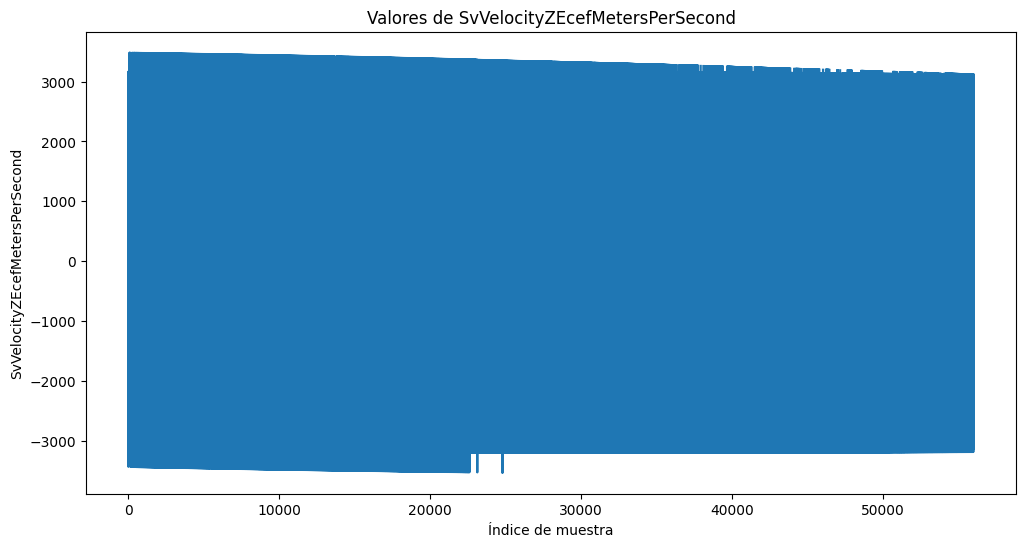

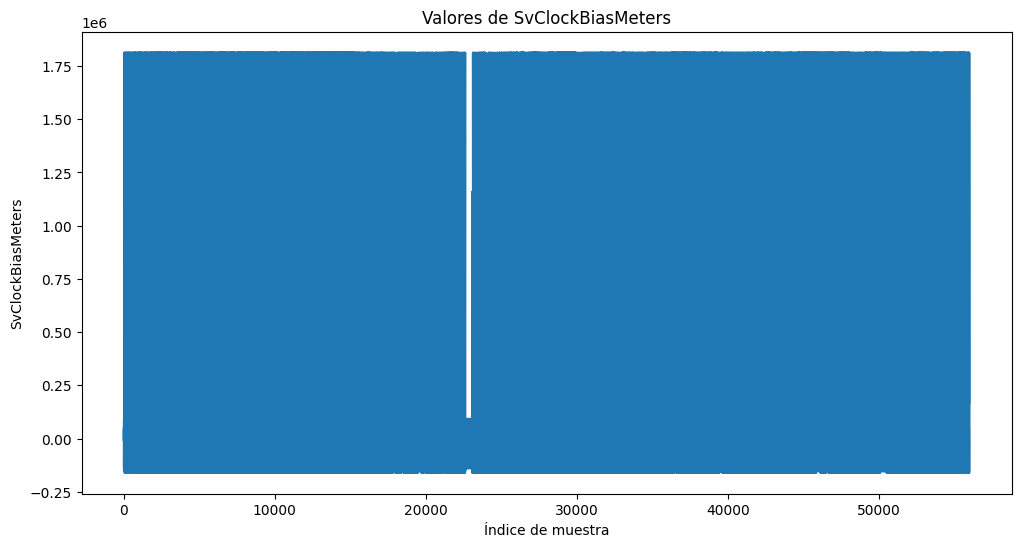

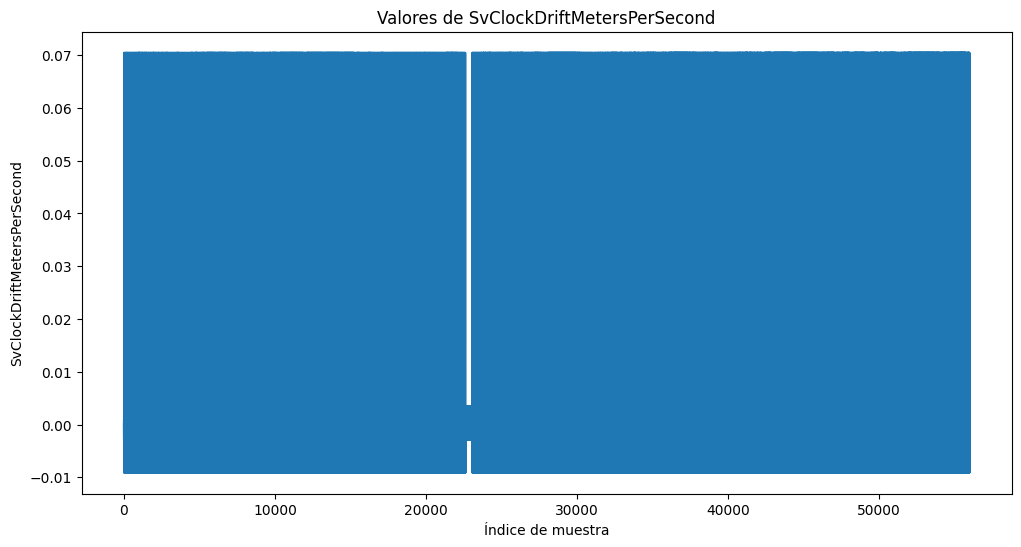

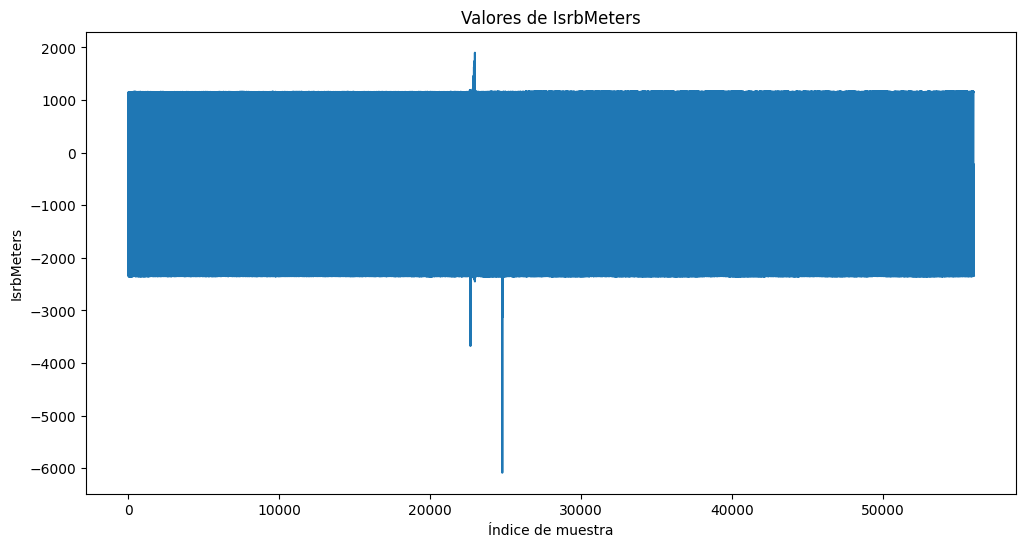

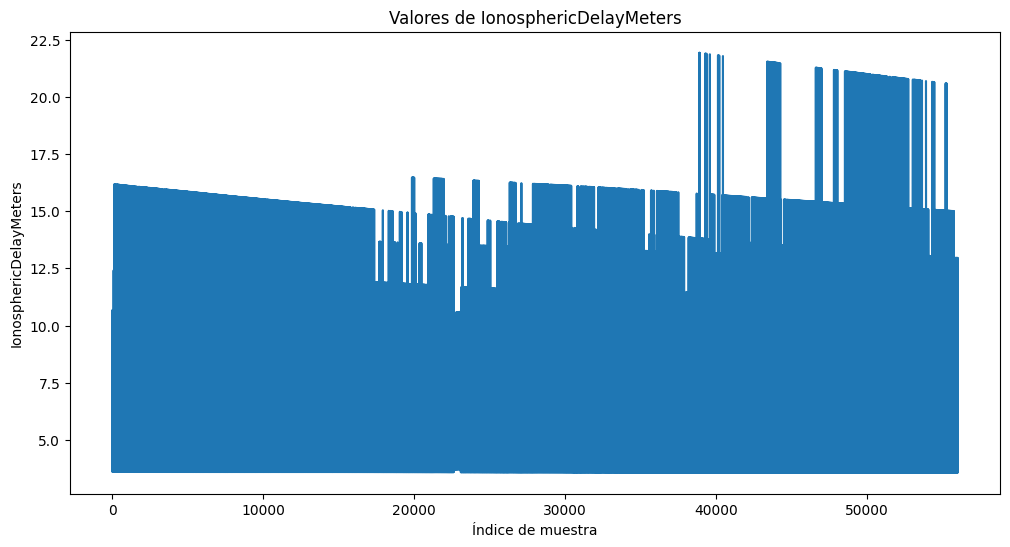

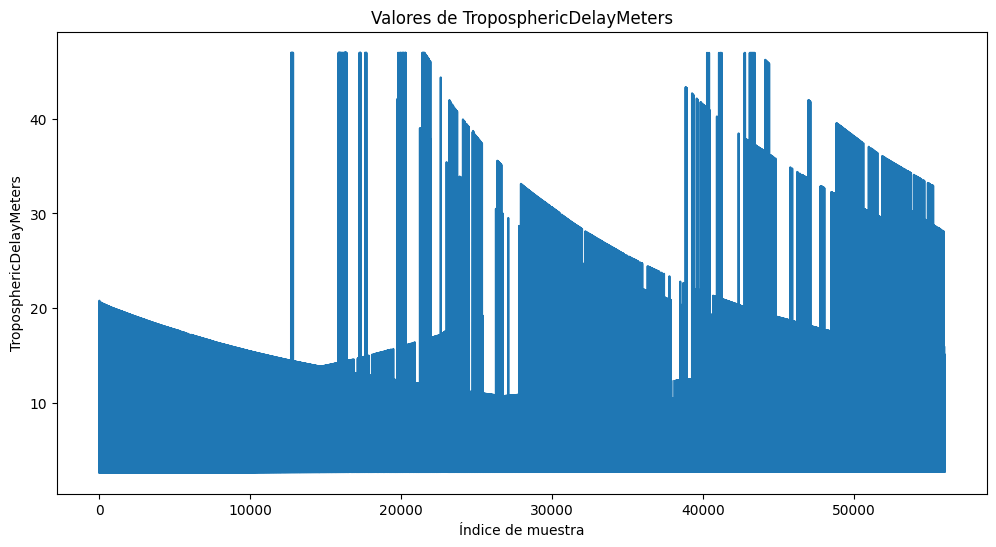

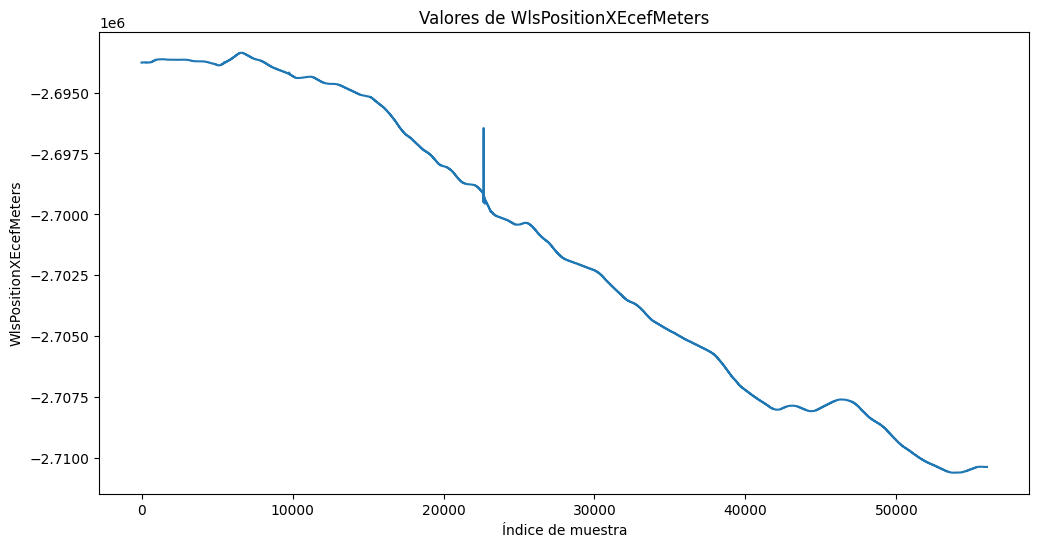

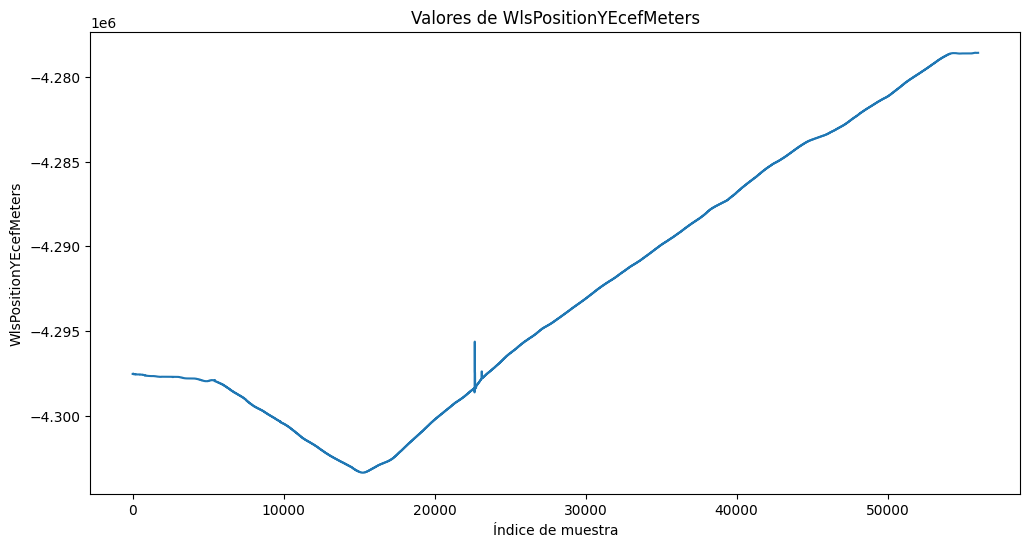

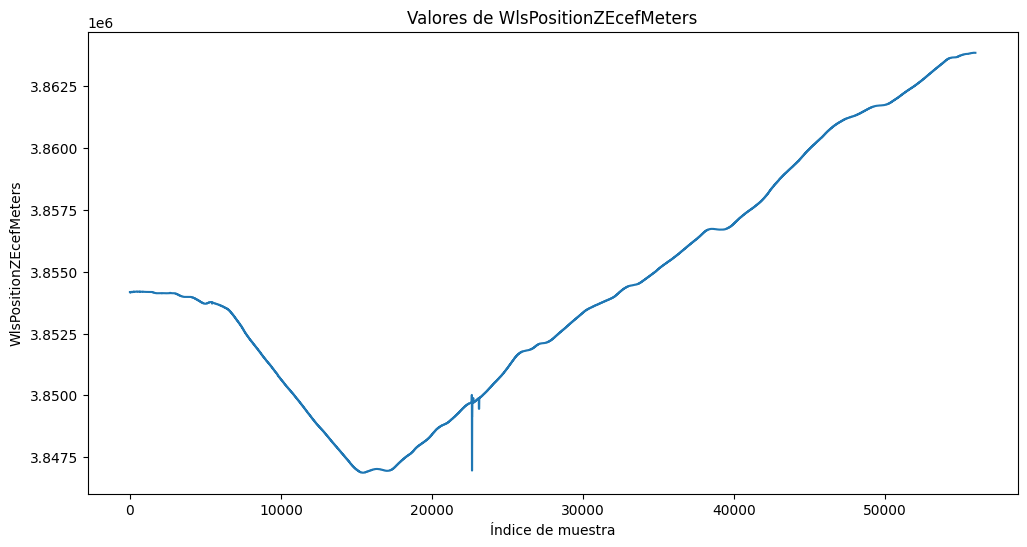

In [9]:
# Graficar los valores de cada columna
for column in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df[column])
    plt.xlabel('Índice de muestra')
    plt.ylabel(column)
    plt.title(f'Valores de {column}')
    plt.show()